# Authors:
### Cauana Schumann - Doctoral student in Urban and Regional Planning at the Federal University of Rio Grande do Sul (UFRGS) 
### Giovani Longo Rosa - Master student in Urban and Regional Planning at the Federal University of Rio Grande do Sul (UFRGS)

# Research Question: How is the relationship between the spatial distribution of Air Pollution (PM10) and the localization of the Permanent Preservation Areas and the Buildings in Porto Alegre, Brazil?

Background:
An aspect of the Anthropocene/Capitalocene is the increasing urbanisation around the world, with over half of the global population already living in cities (UN, 2019). The expansion of urban centres provokes changes in the land use and the reduction of green spaces, which generate a series of side effects such as heat (heatwaves, urban heat island effects, etc) and **air pollution**, associated with climate change and impacts on human/urban health.

Reference: https://population.un.org/wup/Publications/Files/WUP2018-Highlights.pdf

# 1. Initial Commands

Importation of the modules that we are using in this analysis:

In [56]:
## IMPORT MODULES

# to work with table files using DataFrames
import pandas as pd 

# to work with geospatial files using GeoDataFrames
import geopandas as gpd

# to produce plots and maps
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 2. Air pollution

### 2.1. Historical data of PM10 annual mean concentration in the state of Rio Grande do Sul and in the Porto Alegre municipality

First thing we should do here is to **import** and **visualize** our data. 

We will start **importing** the csv files with the Rio Grande do Sul and Porto Alegre data:

In [57]:
## IMPORT HISTORICAL PM10 ANNUAL MEAN CONCENTRATIONS FOR RIO GRANDE DO SUL

# import csv
df1 = pd.read_csv("PM10_RS_2002to2022_historical_annualmean.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null']) 
# generates a DataFrame with the data from Rio Grande do Sul

# check the result
print(df1)

     ID_shape            FONTE                    ESTACAO  PM10   ANO
0          19  Porto Ar Alegre         HCPA Santa Cecília   NaN  2002
1          21  Porto Ar Alegre          UBS Costa e Silva   NaN  2002
2          20  Porto Ar Alegre                UBS Humaitá   NaN  2002
3          22  Porto Ar Alegre               UBS Restinga   NaN  2002
4          18  Porto Ar Alegre                     UFCSPA   NaN  2002
..        ...              ...                        ...   ...   ...
457        13            FEPAM   Santa_Maria_Centro_Móvel   NaN  2022
458        14            FEPAM       Sapucaia_do_Sul_SESI   NaN  2022
459        15            FEPAM             Triunfo_DEPREC   NaN  2022
460        16            FEPAM         Triunfo_Polo_Móvel   NaN  2022
461        17            FEPAM  Triunfo_Polo_Petroquímico   NaN  2022

[462 rows x 5 columns]


In [58]:
## IMPORT HISTORICAL PM10 ANNUAL MEAN CONCENTRATIONS FOR PORTO ALEGRE

# import csv
df2 = pd.read_csv("PM10_POA_2002to2022_historical_annualmean.csv", sep=';', encoding="UTF-8", decimal=',', na_values=['null']) 
# generates a DataFrame with the data from Porto Alegre

# check the result
print(df2)

     ID_shape            FONTE  ... PM10   ANO
0          19  Porto Ar Alegre  ...  NaN  2002
1          21  Porto Ar Alegre  ...  NaN  2002
2          20  Porto Ar Alegre  ...  NaN  2002
3          22  Porto Ar Alegre  ...  NaN  2002
4          18  Porto Ar Alegre  ...  NaN  2002
..        ...              ...  ...  ...   ...
163        22  Porto Ar Alegre  ...  NaN  2022
164        18  Porto Ar Alegre  ...  NaN  2022
165         9            FEPAM  ...  NaN  2022
166        10            FEPAM  ...  NaN  2022
167        11            FEPAM  ...  NaN  2022

[168 rows x 5 columns]


Now we can visualize our data using a **line plot**.

Let's start with the Rio Grande do Sul historical series:

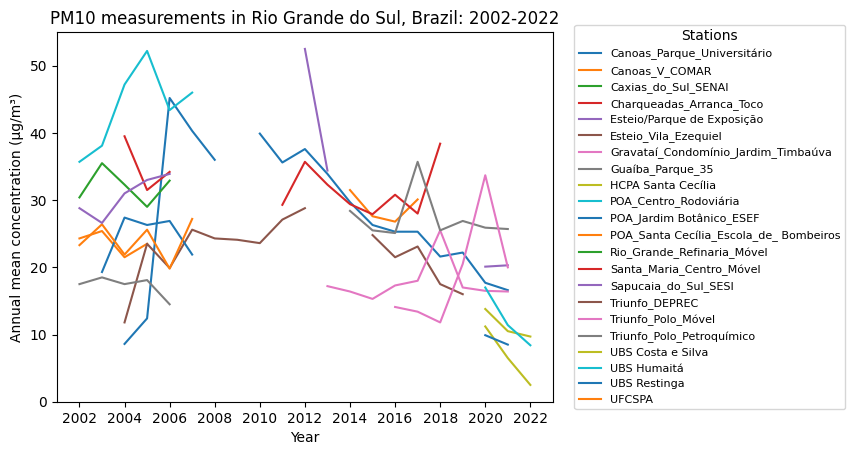

In [59]:
## GENERATE LINE PLOT FROM HISTORICAL DATA OF THE RIO GRANDE DO SUL STATE

# group the data by station
stations = df1.groupby('ESTACAO')

# create a figure (fig) and axis (ax) object
fig, ax = plt.subplots()

# plot each station as a separate line
for name, station in stations: #for each station
    ax.plot(station['ANO'], station['PM10'], label=name) # plot a line plot with the year as X and the PM10 annual mean concentration as Y

# set the title and labels for the axis
ax.set_title('PM10 measurements in Rio Grande do Sul, Brazil: 2002-2022') # adds a title to the plot
ax.set_xlabel('Year') # adds a label in the x axis
ax.set_ylabel('Annual mean concentration (µg/m³)') # adds a label in the y axis
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2)) # sets the step shown in the x axis (in this case, 2 years)

# add a legend to the plot
ax.legend(loc = 'center right', bbox_to_anchor=(1.6, 0.5), fontsize = 8, title= 'Stations')

# display the plot
plt.show()

Oh well... it seems like there are some discontinuities between the PM10 measurements through the period. How is the situation for Porto Alegre?

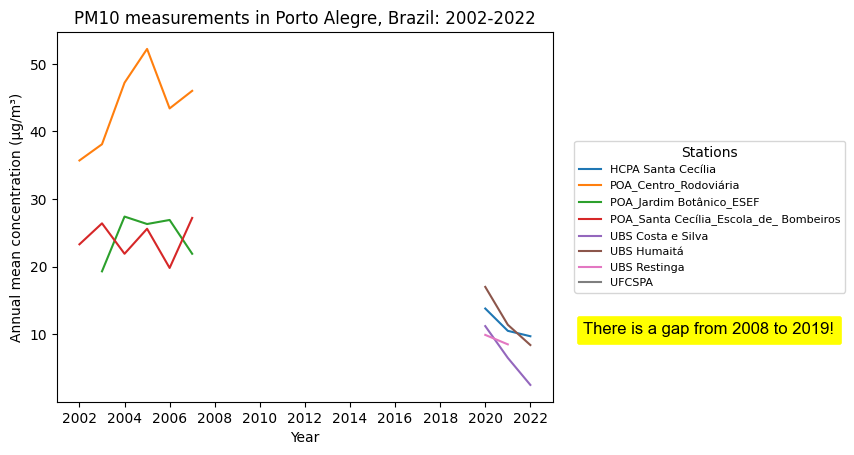

In [60]:
## GENERATE LINE PLOT FROM HISTORICAL DATA OF THE PORTO ALEGRE MUNICIPALITY

# group the data by station
stations = df2.groupby('ESTACAO')

# create a figure and axis object
fig, ax = plt.subplots()

# plot each station as a separate line
for name, station in stations:
    ax.plot(station['ANO'], station['PM10'], label=name)

    # set the title and labels for the axis
    ax.set_title('PM10 measurements in Porto Alegre, Brazil: 2002-2022') # adds a title to the plot
    ax.set_xlabel('Year') # adds a label in the x axis
    ax.set_ylabel('Annual mean concentration (µg/m³)') # adds a label in the y axis
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(2)) # sets the step shown in the x axis (in this case, 2 years)

    # add a legend to the plot
    ax.legend(loc = 'center right', bbox_to_anchor=(1.6, 0.5), fontsize = 8, title= 'Stations')
    
    # add the text "There is a gap from 2008 to 2019!"
    ax.text(2024.35,10,'There is a gap from 2008 to 2019!', fontsize = 12, font = 'Arial', color = 'Black', backgroundcolor = 'Yellow')

# display the plot
plt.show()

Yes, that is correct. As you can see, **air pollution measurements have not been continuous** through the years in Porto Alegre, unfortunately. For PM10, it started in 2002 by FEPAM and was interrupted after 2007, only being restarted in 2020 by another entity (Porto Ar Alegre) in different locations.

Based on this situation, we decided to use here the **PM10 mean concentration for the period between 2002 and 2022** as our indicator of air pollution.

### **2.2. Air Pollution (PM10) measurement points from Porto Alegre**

For this prototype, we are importing a manually crafted geospatial file (a Geopackage, in this case) with the **location** of the sensors and the **aggregate PM10 mean concentration from 2002 to 2022** for each measurement point in the municipality of Porto Alegre, Brazil.

In [61]:
## IMPORTING AIR POLLUTION MEASUREMENT POINTS GEOSPATIAL FILE

#import file (in this case, a Geopackage)
airpollution = gpd.read_file("sensors_pm10_poa.gpkg")

# Check the current CRS of the GeoDataFrame
print(airpollution.crs)

# Transform the CRS to EPSG: 4326 (WGS 84)
airpollution = airpollution.to_crs(epsg=4326)

# Check the new CRS of the GeoDataFrame
print(airpollution.crs)

# check the result (first 5 rows)
print(airpollution.head())

epsg:31982
epsg:4326
   fid_1  ...                          geometry
0    9.0  ...  MULTIPOINT (-51.21959 -30.02385)
1   11.0  ...  MULTIPOINT (-51.20305 -30.04064)
2   10.0  ...  MULTIPOINT (-51.18141 -30.04855)
3   18.0  ...  MULTIPOINT (-51.22101 -30.03171)
4   19.0  ...  MULTIPOINT (-51.20532 -30.03867)

[5 rows x 7 columns]


**But how to know their distribution in the city? We can do a map!**

First we need to import a geospacial file that will work as a base layer. In this case we used the neighbourhoods:

In [62]:
## IMPORT NEIGHBOURHOOD GEOSPATIAL FILE FOR USAGE IN MAPS

# Generate a GeoDataFrame from the file (already uploaded to Datacamp's Workplace)
gdf_neighbourhoods = gpd.read_file("POA_Bairros.gpkg") 

# Check the current CRS of the GeoDataFrame
print(gdf_neighbourhoods.crs)

# Transform the CRS to EPSG: 4326 (WGS 84) 
#for this, is important to used a projected CRS, such as WGS 84, instead of a geographic one
gdf_neighbourhoods = gdf_neighbourhoods.to_crs(epsg=4326)

# Check the new CRS of the GeoDataFrame
print(gdf_neighbourhoods.crs)

# Check the result (first 5 rows)
print(gdf_neighbourhoods.head())

PROJCS["TM-POA",GEOGCS["SIRGAS 2000",DATUM["Sistema_de_Referencia_Geocentrico_para_las_AmericaS_2000",SPHEROID["GRS 1980",6378137,298.257222101],AUTHORITY["EPSG","6674"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4674"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-51],PARAMETER["scale_factor",0.999995],PARAMETER["false_easting",300000],PARAMETER["false_northing",5000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
epsg:4326
   OBJECTID  ...                                           geometry
0      1281  ...  MULTIPOLYGON (((-51.12858 -30.01161, -51.12816...
1      1282  ...  MULTIPOLYGON (((-51.17810 -30.01961, -51.17820...
2      1283  ...  MULTIPOLYGON (((-51.14635 -30.02733, -51.14714...
3      1288  ...  MULTIPOLYGON (((-51.09871 -30.00490, -51.09870...
4      1289  ...  MULTIPOLYGON (((-51.10982 -30.00215, -51.10986...

[5 rows x 

Now, we can generate the map locating the sensors in Porto Alegre:

Text(0.5, 1.0, 'PM10 Sensors')

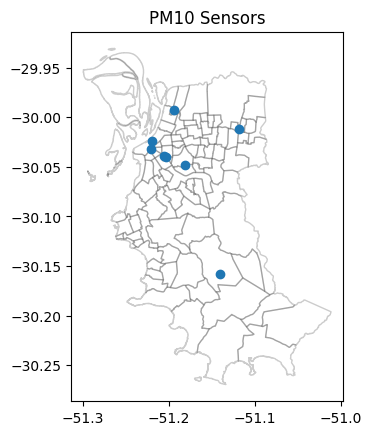

In [63]:
## GENERATE SENSORS MAP

base = gdf_neighbourhoods.plot(facecolor="none", edgecolor="black", alpha=0.2) # layer: Porto Alegre's neighbourhood
airpollution.plot(ax=base) # layer: air pollution sensors
plt.title("PM10 Sensors") # adds a title to the map

# **3. Permanent Preservation Areas (APP) and Buildings**

## 3.1. Permanent Preservation Areas (APP)

We uploaded to Datacamp a geospatial file with the location of the Permanent Preservation Areas (APP) in the city of Porto Alegre.
The determination of the Permanent Preservation Areas locations was defined by city hall by Porto Alegre in 2016. 

First, we need to import the data (in this case, a Geopackage with the APP points):

In [64]:
## IMPORTING PERMANENT PRESERVATION AREAS (APP) POINTS GEOSPATIAL FILE

#import file and generate a GeoDataFrame
app = gpd.read_file("app_point.gpkg")

# Check the current CRS of the GeoDataFrame
print(app.crs)

# Transform the CRS to EPSG: 4326 (WGS 84)
app = app.to_crs(epsg=4326)

# Check the new CRS of the GeoDataFrame
print(app.crs)

# check the result (first 5 rows)
print(app.head())

epsg:31982
epsg:4326
   OBJECTID      POINT_X       POINT_Y                     geometry
0         1  480120.0709  6.663354e+06  POINT (-51.20646 -30.16102)
1         1  480119.4612  6.663351e+06  POINT (-51.20646 -30.16105)
2         1  480118.7162  6.663348e+06  POINT (-51.20647 -30.16108)
3         1  480117.1196  6.663336e+06  POINT (-51.20649 -30.16118)
4         1  480114.7413  6.663321e+06  POINT (-51.20651 -30.16132)


To see the spatial distribution of the APP points, we can produce another map:

Text(0.5, 1.0, 'APPs')

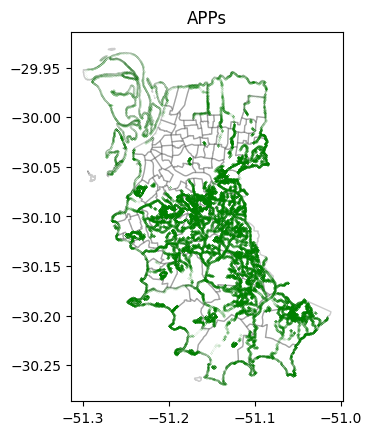

In [65]:
## GENERATE APP MAP

base = gdf_neighbourhoods.plot(facecolor="none", edgecolor="black", alpha=0.2) # layer: Porto Alegre's neighbourhood
app.plot(ax=base,facecolor="green", alpha=0.3, markersize=0.01) # layer: permanent preservation areas
plt.title("APPs") # adds a title to the map

## 3.2. Buildings

We also uploaded a geospatial file with the location of the Buildings delimited by the municipality of Porto Alegre in 2014.

First, we need to import the data (in this case, a Geopackage with the buildings points):

In [66]:
## IMPORTING BUILDINGS MEASUREMENT POINTS GEOSPATIAL FILE

#import file (in this case, a Geopackage)
buildings = gpd.read_file("edif_point.gpkg")

# Check the current CRS of the GeoDataFrame
print(buildings.crs)

# Transform the CRS to EPSG: 4326 (WGS 84)
buildings = buildings.to_crs(epsg=4326)

# Check the new CRS of the GeoDataFrame
print(buildings.crs)

# check the result (first 5 rows)
print(buildings.head())

epsg:31982
epsg:4326
   OBJECTID        POINT_X       POINT_Y                     geometry
0         1  482758.617318  6.657525e+06  POINT (-51.17915 -30.21366)
1         2  485303.573709  6.653526e+06  POINT (-51.15276 -30.24978)
2         3  487045.764476  6.654191e+06  POINT (-51.13464 -30.24380)
3         4  485469.387266  6.654671e+06  POINT (-51.15102 -30.23945)
4         5  486926.263881  6.655420e+06  POINT (-51.13587 -30.23271)


And, once again, to see the spatial distribution of the buildings points, we can generate another map:

Text(0.5, 1.0, 'Buildings')

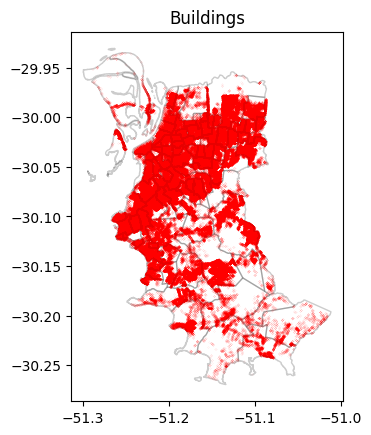

In [67]:
## GENERATE BUILDINGS MAP

base = gdf_neighbourhoods.plot(facecolor="none", edgecolor="black", alpha=0.2) # layer: Porto Alegre's neighbourhood
buildings.plot(ax=base,facecolor="red", alpha=0.3, markersize=0.01) # layer: Porto Alegre's buildings
plt.title("Buildings") # adds a title to the map

# 4. Geospatial Analysis

For this part, we had some issues with Datacamp's workplace and could not update the Geopandas version to use the 'gpd.sjoin()' function (we are using a free account that has no access to the console). In this case, we used QGIS to perform all the geospatial operations described below.

This way, we will demonstrate only the geographic representations of the data analysed.

## 4.1. Buffer of the Air Pollution (PM10) Sensors

We start generating a buffer with 1km radius for each air pollution measurement point in Porto Alegre:

In [68]:
## GENERATE A BUFFER OF 1KM AROUND THE POINTS

# generate the buffer
airpollution_buffer = airpollution.buffer(1/111.11) # We need to convert 1km to degrees, since we are using a projected CRS. One degree equals to 111.11 km, so we need to divide 1 per 111.11 to know how many degrees equal to 1km.

# see the result
print(airpollution_buffer)

0    POLYGON ((-51.21059 -30.02385, -51.21063 -30.0...
1    POLYGON ((-51.19405 -30.04064, -51.19409 -30.0...
2    POLYGON ((-51.17241 -30.04855, -51.17245 -30.0...
3    POLYGON ((-51.21201 -30.03171, -51.21206 -30.0...
4    POLYGON ((-51.19632 -30.03867, -51.19636 -30.0...
5    POLYGON ((-51.18481 -29.99298, -51.18486 -29.9...
6    POLYGON ((-51.10946 -30.01211, -51.10950 -30.0...
7    POLYGON ((-51.13157 -30.15852, -51.13162 -30.1...
dtype: geometry


Now we can see it in a map:

Text(0.5, 1.0, 'PM10 sensors with a 1km buffer')

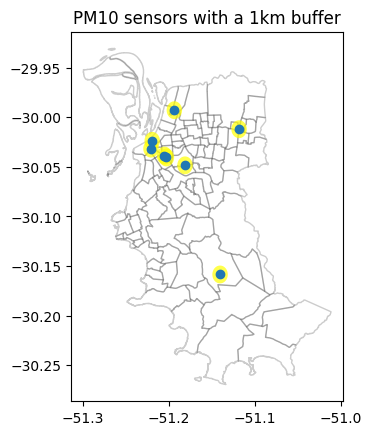

In [69]:
## GENERATE SENSORS BUFFER MAP

base = gdf_neighbourhoods.plot(facecolor="none", edgecolor="black", alpha=0.2) # layer: Porto Alegre's neighbourhood
airpollution_buffer.plot(facecolor="yellow", ax=base, alpha=0.7) # layer: air pollution sensors' buffers
airpollution.plot(ax=base) # layer: air pollution sensors
plt.title("PM10 sensors with a 1km buffer") # adds a title to the map

This allows us to understand the possible **'influence area'** of the sensor.

## 4.2. Air Pollution (PM10) Sensors and Nearest Distance to the APP

This map can help to identify the nearest permanent preservation areas to the air pollution sensors in Porto Alegre:

Text(0.5, 1.0, 'PM10 sensors with a 1km buffer vs APPs')

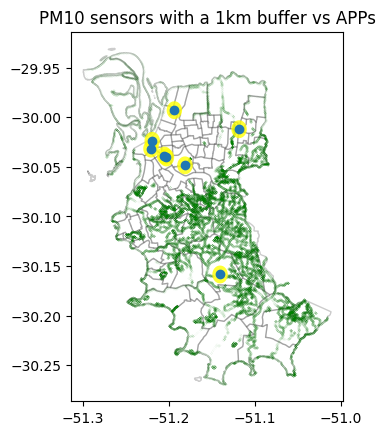

In [70]:
## GENERATE SENSORS BUFFER MAP WITH APPS

base = gdf_neighbourhoods.plot(facecolor="none", edgecolor="black", alpha=0.2) # layer: Porto Alegre's neighbourhood
app.plot(ax=base,facecolor="green", alpha=0.1, markersize=0.01) # layer: permanent preservation areas
airpollution_buffer.plot(facecolor="yellow", ax=base, alpha=0.8) # layer: air pollution sensors' buffers
airpollution.plot(ax=base) # layer: air pollution sensors
plt.title("PM10 sensors with a 1km buffer vs APPs") # adds a title to the map

Since the buffers do not necessarily overlay the APP points, we used **nearest distance from the sensors to an APP in meters** ('nearest hub' in QGIS) as the APP's localization parameter.

## 4.3. Buffer of the Air Pollution (PM10) Sensors and Numbers of Buildings

This analysis identify the building count in the air pollution sensor areas within the radius of 1km in Porto Alegre.

Text(0.5, 1.0, 'Sensors with a 1km buffer vs buildings')

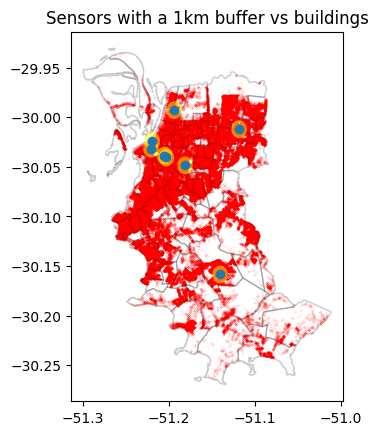

In [71]:
## GENERATE SENSORS BUFFER MAP WITH BUILDINGS

base = gdf_neighbourhoods.plot(facecolor="none", edgecolor="black", alpha=0.2) # layer: Porto Alegre's neighbourhood
buildings.plot(ax=base,facecolor="red", alpha=0.2, markersize=0.01) # layer: Porto Alegre's buildings
airpollution_buffer.plot(facecolor="yellow", ax=base, alpha=0.5) # layer: air pollution sensors' buffers
airpollution.plot(ax=base) # layer: air pollution sensors
plt.title("Sensors with a 1km buffer vs buildings") # adds a title to the map

Since all buffers overlap with at least a building point, we used the **total number of building points inside the buffer**  (building count) as a parameter for buildings localization.

# 5. Correlation Analyzes

Due to issues with the DataCamp (Spatial Join), we had to perform the spatial data analysis in QGIS for 4.2 and 4.3 items to finally calculate the correlation.
 
First, we imported the geospatial file (a Geopackage) we made in QGIS:

In [72]:
## IMPORT JOINED GEOPACKAGE FILE DONE IN QGIS (BECAUSE DATACAMP DID NOT ALLOW US TO USE THE SPATIAL JOIN)

joined = gpd.read_file('pm10_buffer_edif_app.gpkg') #generates a GeoDataFrame

# see the result
print(joined)

     fid_1  ...                             geometry
0      9.0  ...  MULTIPOINT (478864.666 6678637.918)
1      9.0  ...  MULTIPOINT (478896.043 6678520.321)
2      9.0  ...  MULTIPOINT (478785.312 6678513.831)
3      9.0  ...  MULTIPOINT (478886.320 6678498.538)
4      9.0  ...  MULTIPOINT (478771.373 6678626.138)
..     ...  ...                                  ...
364   22.0  ...  MULTIPOINT (486503.831 6663693.530)
365   22.0  ...  MULTIPOINT (486479.983 6663678.292)
366   22.0  ...  MULTIPOINT (486498.549 6663652.586)
367   22.0  ...  MULTIPOINT (486454.852 6663652.881)
368   22.0  ...  MULTIPOINT (486449.655 6663672.348)

[369 rows x 9 columns]


Now we can calculate two correlations, one for **'APP vs Air Pollution (PM10)'** and other for the **'Buildings vs Air Pollution (PM10)'**.

## 5.1. Permanent Preservation Areas (APP) versus Air Pollution (PM10) Sensors

First, we are calculating the correlation between two attributes: the **nearest distance to an APP in meters** and **PM10 mean concentration in micrograms per cubic meter**. 

It is possible to choose the **method** (Pearson, Kendall, Spearman):

In [73]:
## CALCULATE APP VS PM10 CORRELATION

# which method of correlation do you want? 
#options: Pearson ('pearson'), Kendall ('kendall') or Spearman ('spearman') | if you put another name, it gives an error
corr_method = 'pearson' #change the method here

# calculate correlation between attributes
corr_matrix = joined[['pm10_02_22', 'dist_app']].corr(method = corr_method) #create correlation matrix between PM10 mean concentration and nearest distance to an APP
print(corr_matrix) # see the result

# extract the correlation coefficient
correlation = corr_matrix.iloc[0, 1]

# create an If conditional to put the name of the method wherever wanted
if corr_method == 'spearman': 
    corr_name = 'Spearman'
elif corr_method == 'kendall':
    corr_name = 'Kendall'
else:
    corr_name = 'Pearson'

# print the correlation coefficient with 2 decimal places
correlation_rd2 = round(correlation,2) #store the correlation coefficient with 2 decimal places
print(corr_name + " correlation coefficient (PM10 vs APP): ", correlation_rd2) #print the result


            pm10_02_22  dist_app
pm10_02_22    1.000000  0.109606
dist_app      0.109606  1.000000
Pearson correlation coefficient (PM10 vs APP):  0.11


Then, to help visualising, we can generate a **scatter plot**:

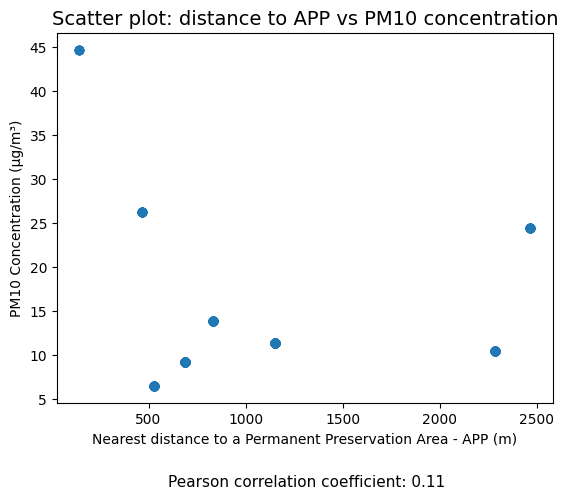

In [74]:
# SCATTER PLOT FOR APP vs PM10

# generate the scatter plot
plt.scatter(joined['dist_app'], joined['pm10_02_22']) # x = nearest distance to an APP, y = PM10 mean concentration 

# put a title and labels in the X and Y axis
plt.title("Scatter plot: distance to APP vs PM10 concentration", fontsize = 14) # puts a title in the plot
plt.xlabel("Nearest distance to a Permanent Preservation Area - APP (m)", fontsize = 10) # adds a label in the x axis
plt.ylabel('PM10 Concentration (µg/m³)', fontsize = 10) # adds a label in the y axis

# exibit a text showing the correlation coefficient with 2 decimal places
plt.text(600,-5, corr_name + " correlation coefficient: " + str(correlation_rd2), fontsize = 11)

# show scatter plot
plt.show()

## 5.2. Buildings versus Air Pollution (PM10) Sensors

It is the same as 5.1., but now we are calculating the correlation between the **building count inside the PM10 sensor's 1km radius buffer** and **PM10 mean concentration in micrograms per cubic meter**. 

In [75]:
## CALCULATE BUILDINGS VS PM10 CORRELATION

# read in joined GeoPackage file - we did it in QGIS because Datacamp did not allow us to use the spatial join
joined = gpd.read_file('pm10_buffer_edif_app.gpkg')
print(joined)

# which method of correlation do you want? 
#options: Pearson ('pearson'), Kendall ('kendall') or Spearman ('spearman') | if you put another name, it gives an error
corr_method = 'pearson' #change the method here

# calculate correlation between attributes of points and polygons
corr_matrix = joined[['pm10_02_22','num_edif']].corr(method = corr_method) #create correlation matrix between PM10 mean concentration and building count inside 1km radius from the PM10 measurement point
print(corr_matrix) # see the result

# extract the correlation coefficient
correlation1 = corr_matrix.iloc[0, 1]

# create an If conditional to put the name of the method wherever wanted
if corr_method == 'spearman': 
    corr_name = 'Spearman'
elif corr_method == 'kendall':
    corr_name = 'Kendall'
else:
    corr_name = 'Pearson'

# print the correlation coefficient with 2 decimal places
correlation1_rd2 = round(correlation1,2) #store the correlation coefficient with 2 decimal places
print(corr_name + " correlation coefficient (PM10 vs Buildings): ", correlation1_rd2) #print the result


     fid_1  ...                             geometry
0      9.0  ...  MULTIPOINT (478864.666 6678637.918)
1      9.0  ...  MULTIPOINT (478896.043 6678520.321)
2      9.0  ...  MULTIPOINT (478785.312 6678513.831)
3      9.0  ...  MULTIPOINT (478886.320 6678498.538)
4      9.0  ...  MULTIPOINT (478771.373 6678626.138)
..     ...  ...                                  ...
364   22.0  ...  MULTIPOINT (486503.831 6663693.530)
365   22.0  ...  MULTIPOINT (486479.983 6663678.292)
366   22.0  ...  MULTIPOINT (486498.549 6663652.586)
367   22.0  ...  MULTIPOINT (486454.852 6663652.881)
368   22.0  ...  MULTIPOINT (486449.655 6663672.348)

[369 rows x 9 columns]
            pm10_02_22  num_edif
pm10_02_22    1.000000 -0.648746
num_edif     -0.648746  1.000000
Pearson correlation coefficient (PM10 vs Buildings):  -0.65


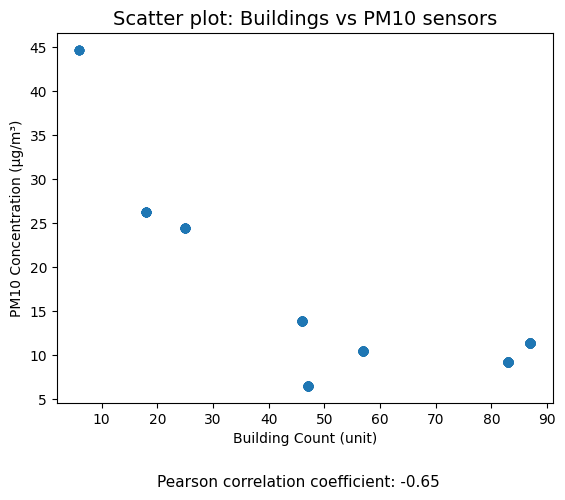

In [76]:
# SCATTER PLOT FOR BUILDINGS vs PM10

# generate the scatter plot
plt.scatter(joined['num_edif'], joined['pm10_02_22'], cmap='viridis') # x = building count inside 1km radius from the PM10 measurement point, y = PM10 mean concentration

# put a title and labels in the X and Y axis
plt.title("Scatter plot: Buildings vs PM10 sensors", fontsize = 14) # adds a title to the plot
plt.xlabel("Building Count (unit)", fontsize = 10) # adds a label in the x axis
plt.ylabel('PM10 Concentration (µg/m³)', fontsize = 10) # adds a label in the y axis

# exibit a text showing the correlation coefficient with 2 decimal places
plt.text(20,-5, corr_name + " correlation coefficient: " + str(correlation1_rd2), fontsize = 11)

# show scatter plot
plt.show()

# 6. Discussion

The results are showing that Permanent Preservation Areas location have a weak positive correlation with PM10 mean concentration, while the buildings have a negative moderate correlation with PM10 mean concentration.

There are some limitations here, such as: 

- Discontinuity of measurements through the years in both state and municipality scales;
- The territorial distribuition (and lack) of air pollution sensors in Porto Alegre, which do;
- The risk of potential equipment malfunctions;
- The sample size (8 sensors), which do not impossibility of having a global vision about the municipality and could imply in a wrong analysis about the location of the permanent preservation areas and the buildings in relation to air pollution in Porto Alegre.

On the other hand, this analysis could demonstrate that only permanent preservation areas and buildings might not be determinant to understand the distribution of air pollution in Porto Alegre.

Although, this analysis is important to understand the difficulty of studying public data in Brazil about air pollution and also can provide a discussion about the location of the air pollution sensor in the city of Porto Alegre. 

Thus, future studies (or versions of this prototype) could improve the approach to this subject and allow to develop a better understanding of the relationship between air pollution and urban settings.

# APPENDIX: Prototype issues we could address in the future

a) Develop a mecanism that automatically imports data from online databases and generates data we can use (in the beginning, we attempted to do it for FEPAM - Rio Grande do Sul's environmental agency - and it was troublesome, especially due to the naming inconsistency);

b) Using a spatial interpolation process (Kriging, IDW, etc.) to estimate the distribution of air pollution along the territory?

This would generate have more points to consider for the statistical operations and, also, could allow to create maps show such distribuition. We attempted it in an earlier version of the prototype, but the quality of the interpolation of the was questionable since it did not show any interference of the measurement points inside Porto Alegre (see maps below);

Map using PM10 interpolated data for all stations in the state of Rio Grande do Sul:
![image](interpolation_test_PM10_2020_old.png)

Map using PM10 interpolated data for all stations in Porto Alegre:
![image](interpolation_test_PM10_2020.png)**

 c) Insert other types of variables related to urban settings (land use, urban mobility parameters, demographics, etc) to identify the relation with air pollution;

d) Use a different Python environment (such as Jupyter, Spyder, RStudio, etc.) that allows us to use the "spatial join" Geopandas function, so we can run geospatial operations smoothly (see text box and code block below);

The issue we faced with Datacamp:

If we run 'gpd.sjoin' function, the system asks for 'rtree' or 'pygeos' modules. And even if we do install it, it will give another error. We believe it is a problem with Datacamp, because we can't update or desinstall and reinstall geopandas.

Here is the error log:

_gpd.sjoin ImportError: Spatial indexes require either `rtree` or `pygeos`. See installation instructions at https://geopandas.org/install.html_

Below is the code we attempted to use:

In [77]:
# EXTRACT THE BUILDING COUNT (DID NOT WORK IN WORKPLACE)

# convert the air pollution buffer GeoSeries to a GeoDataFrame
#airpollution_buffer_gdf = gpd.GeoDataFrame({'geometry': airpollution_buffer})

# perform a spatial join between the air pollution buffer and the building points
#buildings_buffer = gpd.sjoin(buildings, airpollution_buffer_gdf, op='within')

# group the resulting GeoDataFrame by the buffer index and count the number of building points in each group
#building_counts = buildings_buffer.groupby(buildings_buffer.index_right).size()

# join the building counts back to the air pollution buffer GeoDataFrame 
#airpollution_buffer = airpollution_buffer.join(building_counts, on='Name', rsuffix='_count')

# fill any missing values with 0
#airpollution_buffer['building_count'] = airpollution_buffer['building_count'].fillna(0)

e) Use other pollutants, such as CO, NO2, CO2, O3, PM2.5, etc.;

f) Test for other cities (São Paulo, Hamburg, etc).

g) Explore more other temporal scales (year, month, week, day, hour). We actually attempted to do it for the maps presented in 'b', but were not sucessful.